![sms-classifier interface.png](<attachment:sms-classifier interface.png>)
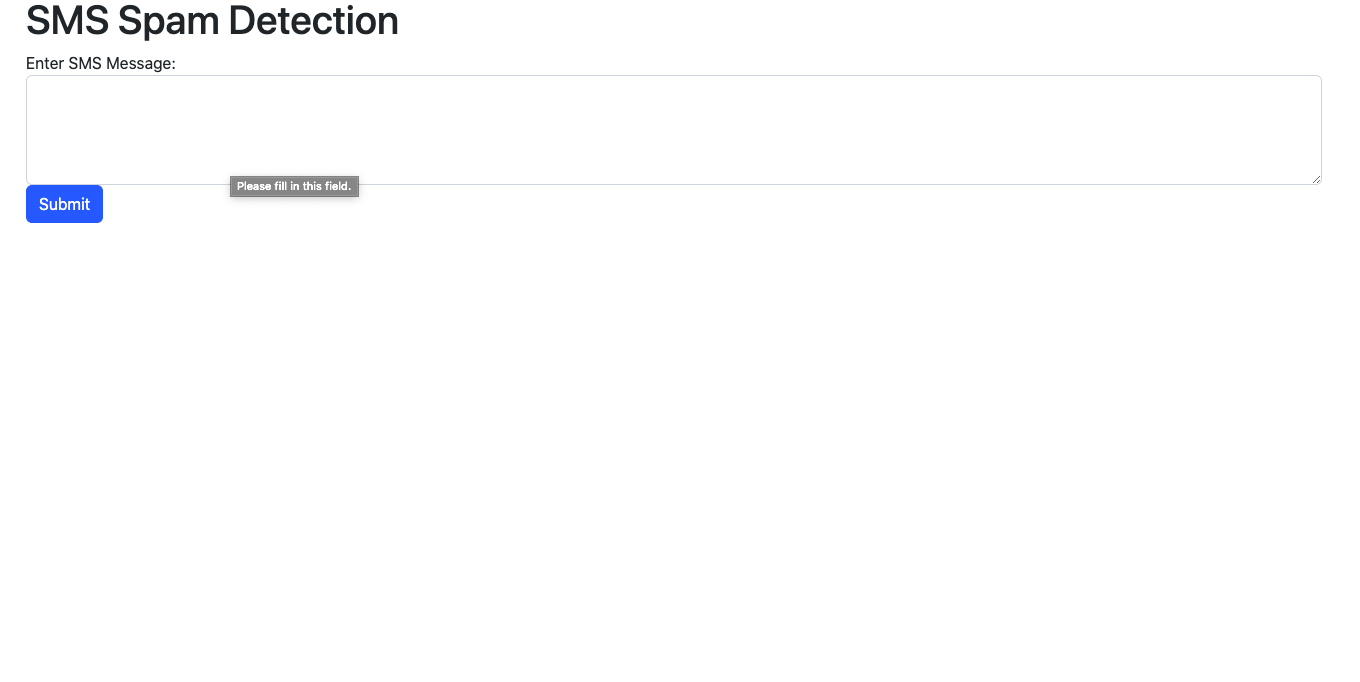

# SMS Classifier
<p> A text classification model to classify SMS as either spam or non-spam using data science techniques in Python

### Data Loading and Preprocessing

#### Import the necessary libraries

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from nltk.corpus import stopwords



### Load and explore the dataset

In [19]:
sms_data = pd.read_csv('data/spam.csv', encoding='latin-1')

sms_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


The dataset has 5572 entries with 5 columns with all being an object datatype. 3 of the columns are not needed and will be removed

### Removing the unnecessary columns 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'

In [20]:
sms_data = sms_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

sms_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Checking for missing values

In [21]:
missing_values = sms_data.isnull().sum()

missing_values

v1    0
v2    0
dtype: int64

The dataset now has no missing values and all unnecessary columns removed

### Visualize the Dataset

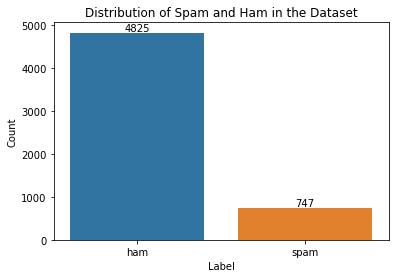

In [22]:
# Visualize the distribution of spam and ham labels
plt.figure(figsize=(6, 4))
sns.countplot(x='v1', data=sms_data)
plt.title('Distribution of Spam and Ham in the Dataset')
plt.xlabel('Label')
plt.ylabel('Count')

# Display data labels
for index, value in enumerate(sms_data['v1'].value_counts()):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

The clean dataset now have 4825 sms that are not spam and 747 sms that are marked spam.

### Preprocess the text data

In [23]:
# Remove stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the text column
sms_data['processed_text'] = sms_data['v2'].apply(preprocess_text)


### Split the dataset into training and testing sets

In [24]:
# Split the dataset into features (X) and labels (y)
X = sms_data['processed_text']
y = sms_data['v1']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature extraction using CountVectorizer

In [26]:
# Convert the text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


### Train the model

In [27]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)


MultinomialNB()

### Evaluate the model

In [28]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_vec)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9838565022421525
Confusion Matrix:
[[961   4]
 [ 14 136]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       965
        spam       0.97      0.91      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



The model achieved an accuracy of 98.39%, demonstrating its efficacy in correctly categorizing SMS messages

### Save the model for deployment

In [17]:
# Save the model and vectorizer using joblib
joblib.dump(classifier, 'application/model/spam_detection_model.joblib')
joblib.dump(vectorizer, 'application/model/spam_detection_vectorizer.joblib')

['application/model/spam_detection_vectorizer.joblib']

### Model deployment

This model was deployed using simple browser-based user interface using Flask for users to input SMS messages and receive spam detection results, for testing purposes